# Project

## 국채 10Y Rate 관찰

In [7]:
import pandas as pd
#pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [9]:
pd.reset_option('display.max_rows')

In [10]:
df_10Y_rate = pd.read_csv('10Y Rate.csv', index_col = 'Date')
print(df_10Y_rate.shape[0])
df_10Y_rate 

5582


,Close,Open,High,Low,Change
Date,,,,,
2000-10-26,8.300,8.300,8.300,8.300,-0.0060
2000-10-27,8.240,8.240,8.240,8.240,-0.0072
2000-10-28,8.240,8.240,8.240,8.240,0.0000
2000-10-30,8.220,8.220,8.220,8.220,-0.0024
2000-11-01,8.150,8.150,8.150,8.150,-0.0085
...,...,...,...,...,...
2021-12-24,2.210,2.188,2.220,2.185,-0.0023
2021-12-25,2.202,2.202,2.202,2.202,-0.0036
2021-12-26,2.202,2.202,2.202,2.202,0.0000


In [12]:
df_10Y_rate_close = df_10Y_rate[['Close']]
df_10Y_rate_close

,Close
Date,
2000-10-26,8.300
2000-10-27,8.240
2000-10-28,8.240
2000-10-30,8.220
2000-11-01,8.150
...,...
2021-12-24,2.210
2021-12-25,2.202
2021-12-26,2.202


<AxesSubplot:xlabel='Date'>

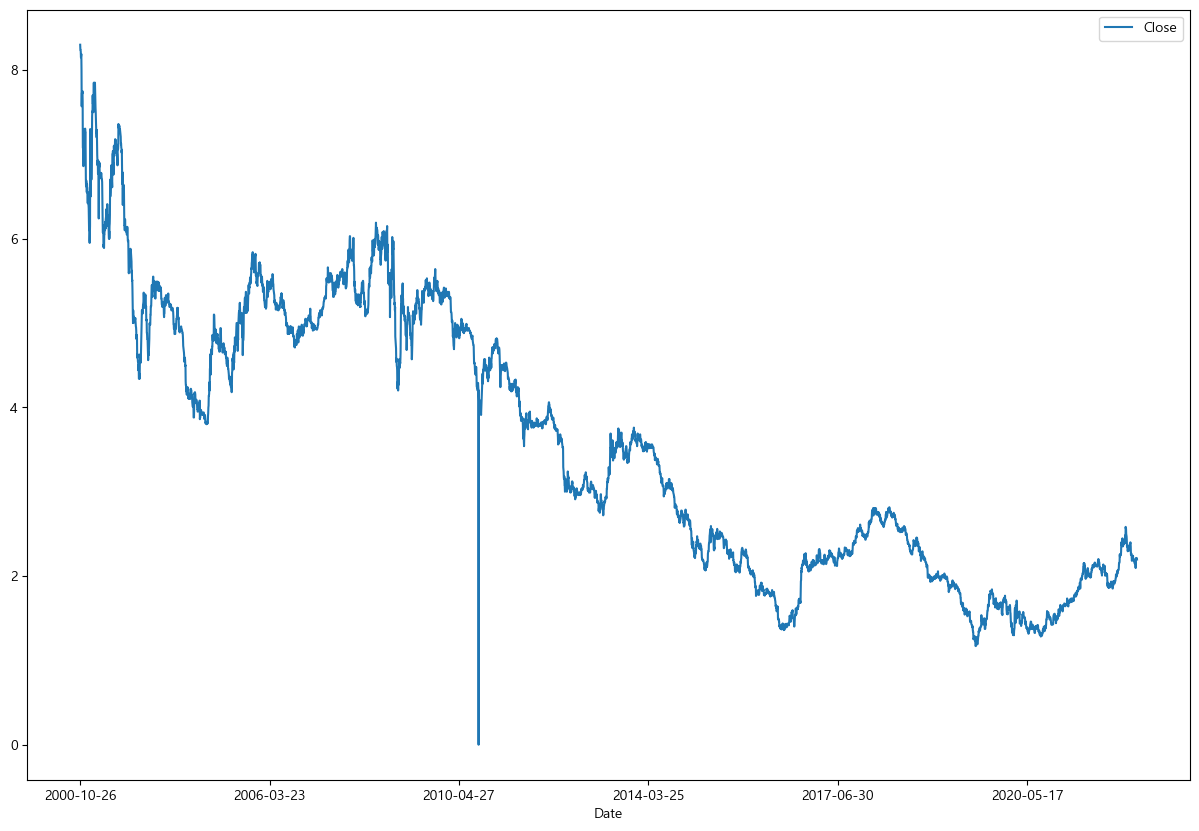

In [14]:
df_10Y_rate_close.plot(figsize = (15,10))

이상한 값 있다.. 한번 빼보자...

In [34]:
df_10Y_rate_close.min()
drop_index = df_10Y_rate_close['Close'].argmin()
drop_index

2104

In [22]:
df_10Y_rate_close.drop(drop_index, axis = 0) # 잘못생각한것 ...

KeyError: '[2104] not found in axis'

In [35]:
df_10Y_rate_close.iloc[drop_index]

Close    0.0
Name: 2010-09-28, dtype: float64

In [32]:
df_10Y_rate_close.index[drop_index]

'2010-09-28'

In [23]:
df_10Y_rate_close.drop(df_10Y_rate_close.iloc[drop_index], axis=0)

KeyError: '[0.0] not found in axis'

<AxesSubplot:xlabel='Date'>

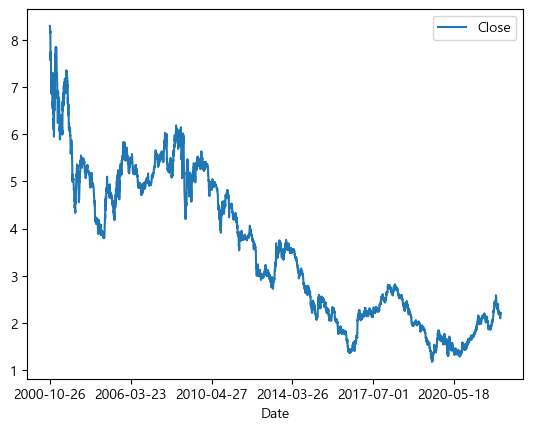

In [38]:
df_10Y_rate_close = df_10Y_rate_close.drop(df_10Y_rate_close.index[drop_index], axis=0)
df_10Y_rate_close.plot()

## 상승 구간 찾아 내기

,Close
Date,
2016-10-01,1.424
2016-10-04,1.455
2016-10-05,1.511
2016-10-06,1.542
2016-10-07,1.530
...,...
2018-02-14,2.763
2018-02-15,2.752
2018-02-18,2.752


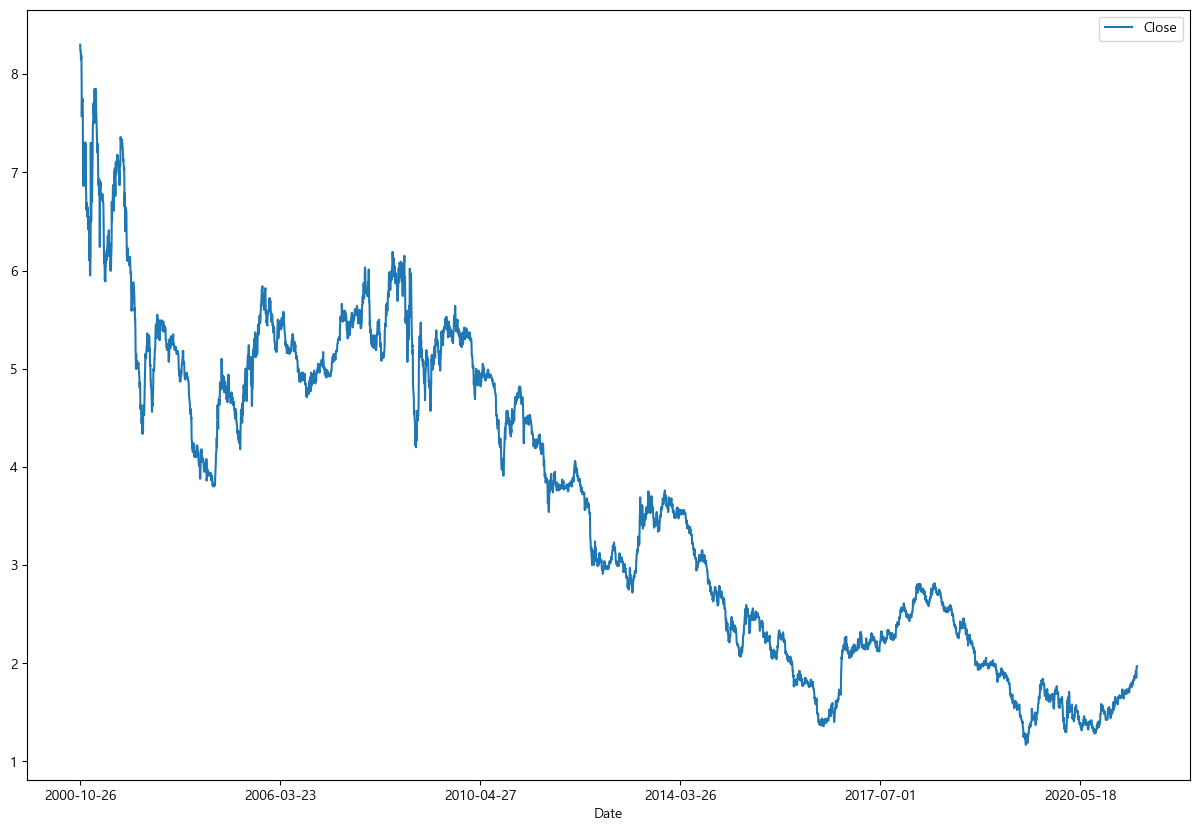

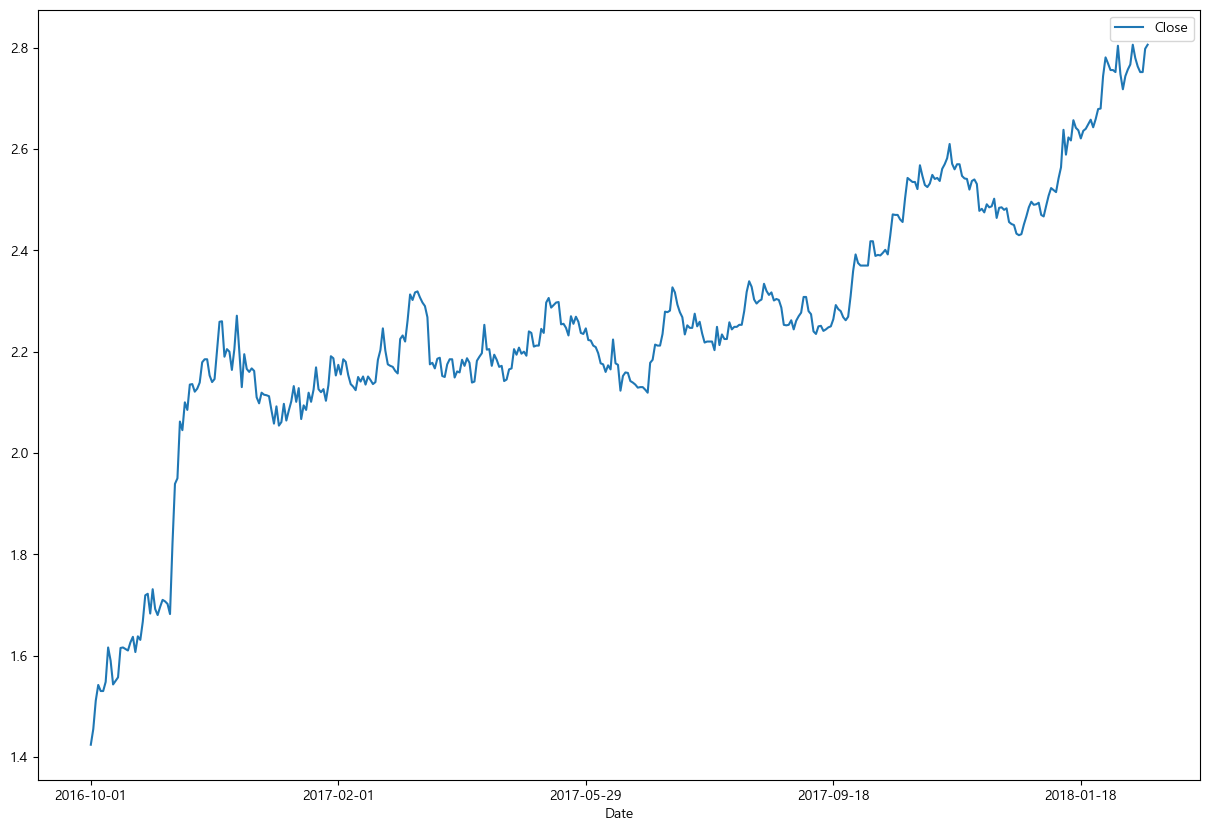

In [40]:
#
#df_10Y_rate_close.plot(figsize = (15,10))

df_10Y_rate_close.loc['2000-10-26':'2021-02-28'].plot(figsize = (15,10))
# 쪼개 가면서 확인?
df_10Y_rate_close.loc['2016-10-01':'2018-02-20'].plot(figsize = (15,10))
df_10Y_rate_close_sample = df_10Y_rate_close.loc['2016-10-01':'2018-02-20']
df_10Y_rate_close_sample

## 분석할 섹터 고르기
* KODEX ETF DataFrame 만들기
* krx_df에서 KODEX ETF만 뽑아내기

In [42]:
krx_df = pd.read_csv("KRX.csv", encoding='cp949', index_col = 0)
krx_df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
0,60310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,NaN
1,95570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시,NaN
2,6840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,NaN
3,54620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,NaN
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7296,547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7297,545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7298,3280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시,NaN
7299,37440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시,NaN


In [43]:
krx_df['Name']

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
7296    흥국화재2우B
7297      흥국화재우
7298       흥아해운
7299         희림
7300         힘스
Name: Name, Length: 7301, dtype: object

In [44]:
krx_df['Name'].values

array(['3S', 'AJ네트웍스', 'AK홀딩스', ..., '흥아해운', '희림', '힘스'], dtype=object)

In [45]:
# ??
'KODEX' in krx_df['Name'].values

False

In [46]:
kodex_index= []

for i in range(krx_df.shape[0]):
    if 'KODEX' in krx_df['Name'].values[i]:
        kodex_index.append(i)
        
kodex_etf_info = krx_df.iloc[kodex_index]
kodex_etf_info

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
1492,69500,KOSPI,KODEX 200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1493,226980,KOSPI,KODEX 200 중소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,337160,KOSPI,KODEX 200ESG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,363580,KOSPI,KODEX 200IT TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,278530,KOSPI,KODEX 200TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1617,375770,KOSPI,KODEX 탄소효율그린뉴딜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618,266410,KOSPI,KODEX 필수소비재,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1619,298770,KOSPI,KODEX 한국대만IT프리미어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620,266420,KOSPI,KODEX 헬스케어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# list comprehension 
# https://shoark7.github.io/programming/python/about-list-comprehension-python
kodex_index = [index for index in range(krx_df.shape[0]) if 'KODEX' in krx_df['Name'].values[index]]

kodex_etf_info = krx_df.iloc[kodex_index]
kodex_etf_info

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
1492,69500,KOSPI,KODEX 200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1493,226980,KOSPI,KODEX 200 중소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,337160,KOSPI,KODEX 200ESG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,363580,KOSPI,KODEX 200IT TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,278530,KOSPI,KODEX 200TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1617,375770,KOSPI,KODEX 탄소효율그린뉴딜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1618,266410,KOSPI,KODEX 필수소비재,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1619,298770,KOSPI,KODEX 한국대만IT프리미어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620,266420,KOSPI,KODEX 헬스케어,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
kodex_etf_info.shape

(130, 11)

In [49]:
# 섹터 임의 선택 
sector_list = ['KODEX 200', 'KODEX IT', 'KODEX 건설', 'KODEX 게임산업', 'KODEX 경기소비재', 'KODEX 고배당', 'KODEX 골드선물(H)',
              'KODEX 구리선물(H)', 'KODEX 기계장비', 'KODEX 바이오', 'KODEX 반도체', 'KODEX 보험', 'KODEX 에너지화학', 'KODEX 운송',
              'KODEX 은행', 'KODEX 자동차', 'KODEX 증권', 'KODEX 철강', 'KODEX 필수소비재', 'KODEX 헬스케어']

In [50]:
len(sector_list)

20

## KODEX df 만들기

KODEX Sector DataFrame
* 위에서 선택한 Sector_list에 해당하는 KODEX Sector DF 만든다
* 관찰할 Sample DataFrame을 만든다

In [51]:
kodex_etf_price_df = pd.read_csv('KODEX_ETF.csv', index_col = 'Date')
kodex_etf_price_df

,KODEX 200,KODEX 200 중소형,KODEX 200ESG,KODEX 200IT TR,KODEX 200TR,KODEX 200exTOP,KODEX 200가치저변동,KODEX 200동일가중,KODEX 200롱코스닥150숏선물,KODEX 200미국채혼합,...,KODEX 코스피100,KODEX 코스피TR,KODEX 코스피대형주,KODEX 콩선물(H),KODEX 퀄리티Plus,KODEX 탄소효율그린뉴딜,KODEX 필수소비재,KODEX 한국대만IT프리미어,KODEX 헬스케어,KODEX 혁신기술테마액티브
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,20592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8840,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,21239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,21118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8960,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,21081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8995,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,20784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,13590.0,14300.0,13960.0,13070.0,13325.0,10925.0,11990.0,10305.0,13320.0,...,30660.0,13890.0,14075.0,11570,10355.0,9715.0,8370.0,20830.0,15875.0,13145.0
2021-12-24,40115,13745.0,14470.0,14135.0,13160.0,13425.0,10955.0,12070.0,10300.0,13340.0,...,30795.0,13960.0,14175.0,11525,10405.0,9790.0,8350.0,20855.0,15785.0,13210.0
2021-12-27,39880,13735.0,14385.0,14000.0,13100.0,13405.0,10925.0,12060.0,10180.0,13320.0,...,30630.0,13905.0,14095.0,11640,10475.0,9775.0,8350.0,21025.0,16015.0,13195.0


In [52]:
kodex_etf_info['Name'].isin(sector_list)

1492     True
1493    False
1494    False
1495    False
1496    False
        ...  
1617    False
1618     True
1619    False
1620     True
1621    False
Name: Name, Length: 130, dtype: bool

In [53]:
kodex_etf_info['Name'].isin(sector_list).sum()

20

In [56]:
kodex_sector_df = kodex_etf_price_df[sector_list]
kodex_sector_df

,KODEX 200,KODEX IT,KODEX 건설,KODEX 게임산업,KODEX 경기소비재,KODEX 고배당,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강,KODEX 필수소비재,KODEX 헬스케어
Date,,,,,,,,,,,,,,,,,,,,
2012-01-02,20592,NaN,5101,NaN,NaN,NaN,11975,7900,14745,NaN,13969,5784,9967,4966,5359,19290,4849,9084,NaN,NaN
2012-01-03,21239,NaN,5234,NaN,NaN,NaN,12110,7990,15434,NaN,14180,5862,10349,5117,5513,19829,5003,9348,NaN,NaN
2012-01-04,21118,NaN,5224,NaN,NaN,NaN,12170,8000,15539,NaN,14097,5877,10258,5141,5435,19936,5017,9528,NaN,NaN
2012-01-05,21081,NaN,5255,NaN,NaN,NaN,12380,7955,15419,NaN,14102,5889,10510,5131,5376,20051,5012,9605,NaN,NaN
2012-01-06,20784,NaN,5116,NaN,NaN,NaN,12390,7920,15203,NaN,13983,5784,10294,5047,5345,19657,4926,9433,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,21330.0,3375,16880.0,11450.0,10090.0,12195,8085,5550,12315.0,38760,6545,18030,5755,7550,20925,8135,8530,8370.0,15875.0
2021-12-24,40115,21510.0,3400,16945.0,11500.0,10135.0,12200,8080,5530,12200.0,38700,6565,18235,5740,7565,21585,8175,8540,8350.0,15785.0
2021-12-27,39880,21300.0,3350,16860.0,11520.0,10140.0,12220,8010,5495,12340.0,38575,6580,18180,5660,7475,21460,8140,8480,8350.0,16015.0


In [57]:
kodex_sector_df.isna().sum(axis = 0)

KODEX 200           0
KODEX IT         1292
KODEX 건설            0
KODEX 게임산업       1614
KODEX 경기소비재      1292
KODEX 고배당        1425
KODEX 골드선물(H)       0
KODEX 구리선물(H)       0
KODEX 기계장비          0
KODEX 바이오        1075
KODEX 반도체           0
KODEX 보험            0
KODEX 에너지화학         0
KODEX 운송            0
KODEX 은행            0
KODEX 자동차           0
KODEX 증권            0
KODEX 철강            0
KODEX 필수소비재      1292
KODEX 헬스케어       1292
dtype: int64

In [58]:
kodex_sector_df.loc['2016-10-01':'2018-02-20'].isna().sum(axis = 0)

KODEX 200          0
KODEX IT         121
KODEX 건설           0
KODEX 게임산업       340
KODEX 경기소비재      121
KODEX 고배당        254
KODEX 골드선물(H)      0
KODEX 구리선물(H)      0
KODEX 기계장비         0
KODEX 바이오          0
KODEX 반도체          0
KODEX 보험           0
KODEX 에너지화학        0
KODEX 운송           0
KODEX 은행           0
KODEX 자동차          0
KODEX 증권           0
KODEX 철강           0
KODEX 필수소비재      121
KODEX 헬스케어       121
dtype: int64

In [59]:
# 날짜기간과 안 맞는 Sector을 분별한다
drop_list = ['KODEX 게임산업', 'KODEX 고배당', 'KODEX IT', 'KODEX 필수소비재', 'KODEX 헬스케어', 'KODEX 경기소비재']
kodex_sector_df = kodex_sector_df.drop(drop_list, axis = 1)
kodex_sector_df

,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,
2012-01-02,20592,5101,11975,7900,14745,NaN,13969,5784,9967,4966,5359,19290,4849,9084
2012-01-03,21239,5234,12110,7990,15434,NaN,14180,5862,10349,5117,5513,19829,5003,9348
2012-01-04,21118,5224,12170,8000,15539,NaN,14097,5877,10258,5141,5435,19936,5017,9528
2012-01-05,21081,5255,12380,7955,15419,NaN,14102,5889,10510,5131,5376,20051,5012,9605
2012-01-06,20784,5116,12390,7920,15203,NaN,13983,5784,10294,5047,5345,19657,4926,9433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,3375,12195,8085,5550,12315.0,38760,6545,18030,5755,7550,20925,8135,8530
2021-12-24,40115,3400,12200,8080,5530,12200.0,38700,6565,18235,5740,7565,21585,8175,8540
2021-12-27,39880,3350,12220,8010,5495,12340.0,38575,6580,18180,5660,7475,21460,8140,8480
